title: "Chapter 9 - Support Vector Machines"
author: "Daniel Morgan"
date: "23 March 2018"

#  Support Vector Classifier

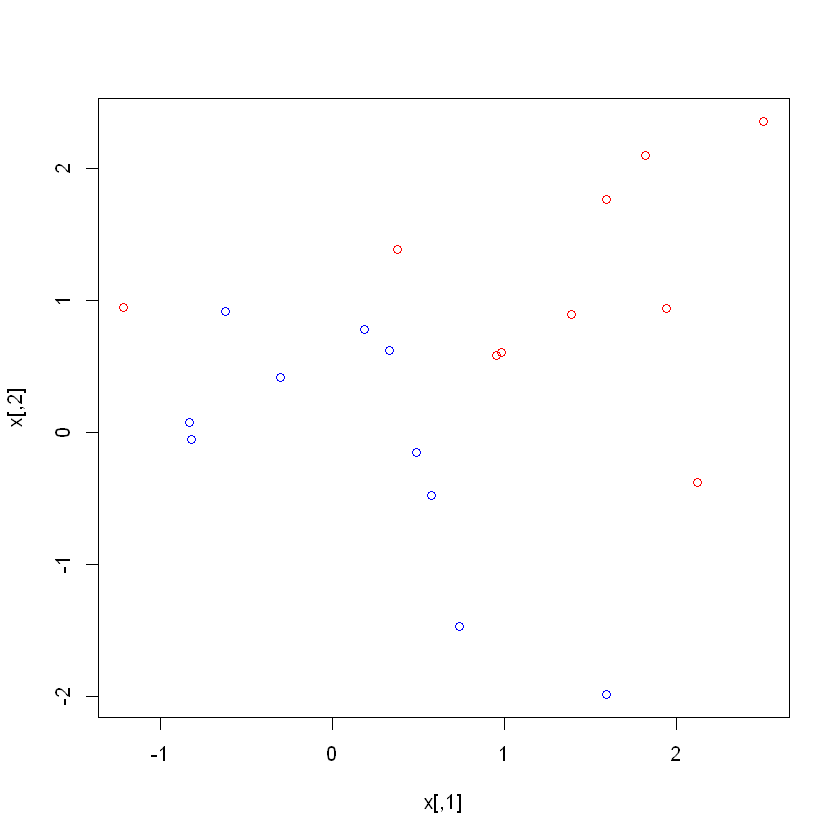

In [1]:
set.seed(1)
x <- matrix(rnorm(20*2), ncol=2)
y <- c(rep(-1,10), rep(1,10))
x[y==1,] <- x[y==1,] + 1
plot(x, col=(3-y))

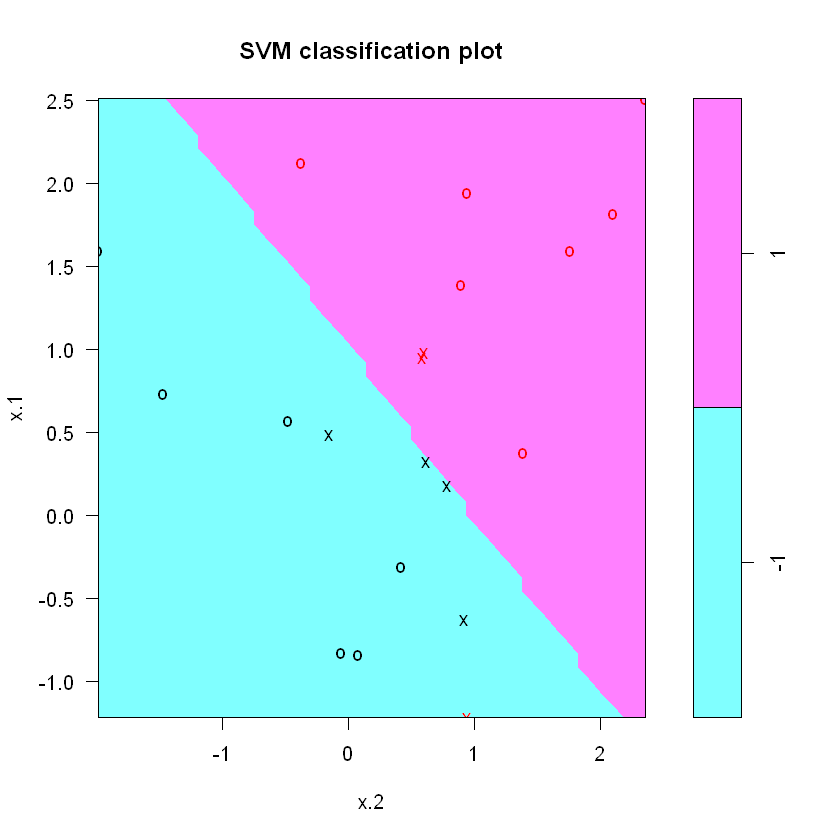

In [2]:
## The classes are not linearly separable so we fit a support vector classifier. To perform classification the response must be encoded as a factor

dat <- data.frame(x=x, y=as.factor(y))

library(e1071)

svmfit <- svm(y~., data=dat, kernel="linear", cost=10,scale=FALSE) # Cost controls the tradeoff between classifying everything correctly or the points that we classify correctly being *very* correct.

# In the classification setting with linear margins, When the cost argument is small, then the margins will be wide and many support vectors will be on the margin or will violate the margin. When the cost argument is large, then the margins will be narrow and there will be few support vectors on the margin or violating the margin.

plot(svmfit, dat)

In [3]:
# The support vectors are plotted as crosses and the remaining observations are plotted as circles; we see here that there are seven support vectors

svmfit$index
 

[1]  1  2  5  7 14 16 17

In [4]:
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




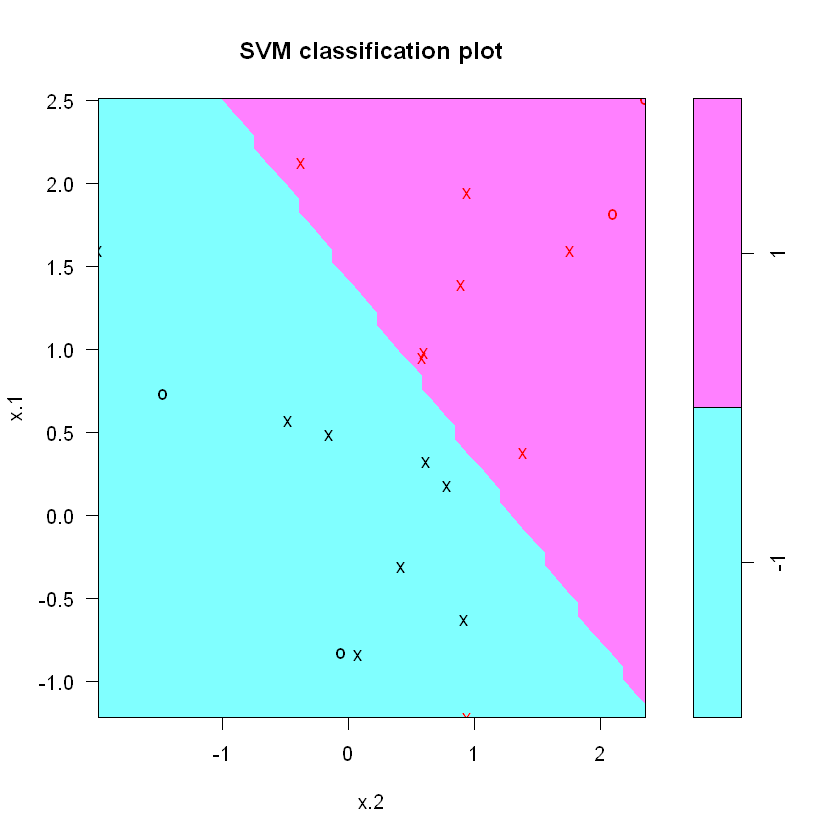

In [5]:
# There were seven support vectors, four in one class and three in the other. What if we instead used a smaller value of the cost parameter?

svmfit <- svm(y~., data=dat, kernel="linear", cost=0.1,scale=FALSE)
plot(svmfit, dat)

In [6]:
svmfit$index # When a smaller cost is used, we get more support vectors because the margin is now wider. Unfortunately, the svm() function does not explicitly output the coefficients of the linear decision boundary obtained when the support vector classifier is fit, nor does it output the width of the margin. 

[1]  1  2  3  4  5  7  9 10 12 13 14 15 16 17 18 20

# Cross Validation to select Cost parameter - tune() function

In [7]:
set.seed(1)
tune.out <- tune(svm,y~.,data=dat,kernel="linear",ranges=list(cost=c(0.001, 0.01, 0.1, 1,5,10,100)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.1 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.70  0.4216370
2 1e-02  0.70  0.4216370
3 1e-01  0.10  0.2108185
4 1e+00  0.15  0.2415229
5 5e+00  0.15  0.2415229
6 1e+01  0.15  0.2415229
7 1e+02  0.15  0.2415229


In [8]:
## Cost = 2.04 gives the smallest cross validation error rate

bestmod <- tune.out$best.model
summary(bestmod)


Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




In [9]:
## Creating a test set

xtest <- matrix(rnorm(20*2), ncol=2)
ytest <- sample(c(-1,1), 20, rep=TRUE)
xtest[ytest==1,] <- xtest[ytest==1,] + 1
testdat <- data.frame(x=xtest, y=as.factor(ytest))

## Using the best model to predict classes for test data

ypred <- predict(bestmod,testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1  1
     -1 11  1
     1   0  8

In [10]:
# With cost of 0.1, 19 observations are correctly classified. What if we use cost = 0.001?

svmfit <- svm(y~., data=dat, kernel="linear", cost=.001,scale=FALSE)
ypred <- predict(svmfit,testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1  1
     -1 11  2
     1   0  7

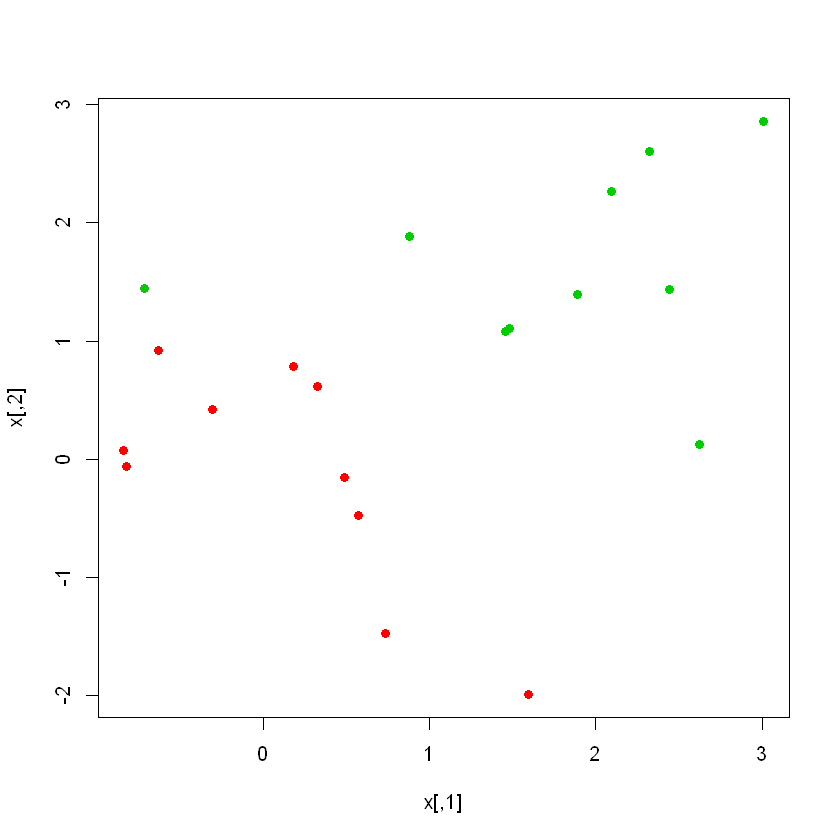

In [11]:
## One extra data point is misclassified

## Considering a situation where the two classes are linearly separable. We can find a separating hyperplane using the svm() function

# Further separating the two classes in the data so that they are linearly separable:

x[y==1,] <- x[y==1,]+0.5
plot(x, col=(y+5)/2, pch=19)

In [12]:
# We fit the support vector classifier and plot the resulting hyperplane, using a very large value of cost so that no observations are misclassified.

dat <- data.frame(x=x, y=as.factor(y))
svmfit <- svm(y~., data = dat, kernel = "linear", cost = 1e+05)
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 
      gamma:  0.5 

Number of Support Vectors:  3

 ( 1 2 )


Number of Classes:  2 

Levels: 
 -1 1




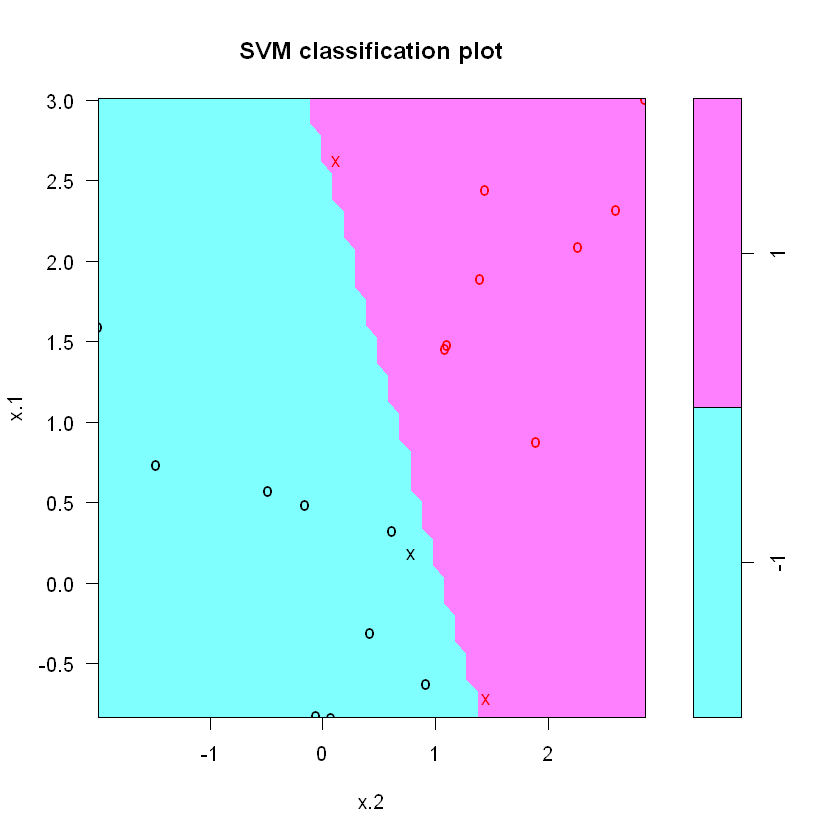

In [13]:
plot(svmfit, dat)
# No training errors were made and only 3 support vectors were used. However, we can see from the figure that the margin is very narrow (because the observations that are not support vectors, indicated as circles, are very close to the decision boundary). It seems likely that this model will perform poorly on test data. 

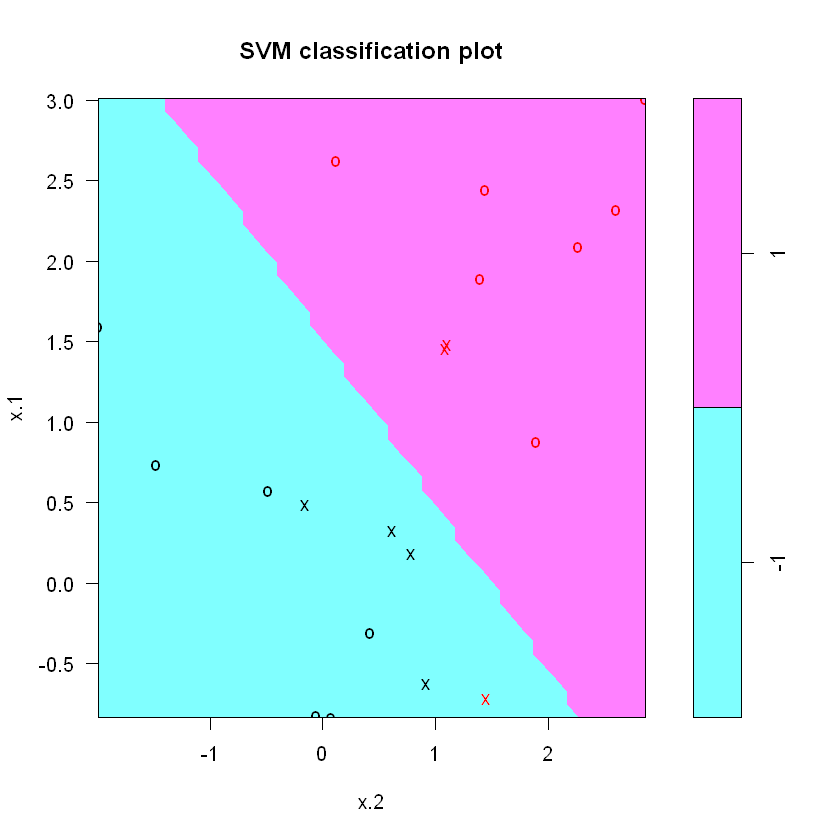

In [14]:
## Trying with a smaller value for cost

svmfit <- svm(y∼., data=dat , kernel ="linear", cost=1)
plot(svmfit, dat)

In [15]:
summary(svmfit)
#Using cost = 1, we misclassify a training observation (red x at 1.5), but we also obtain a much wider margin and make use of seven support vectors. It seems like that this model will outperform the model with cost = 1e5 on test data.


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




# Support Vector Machine

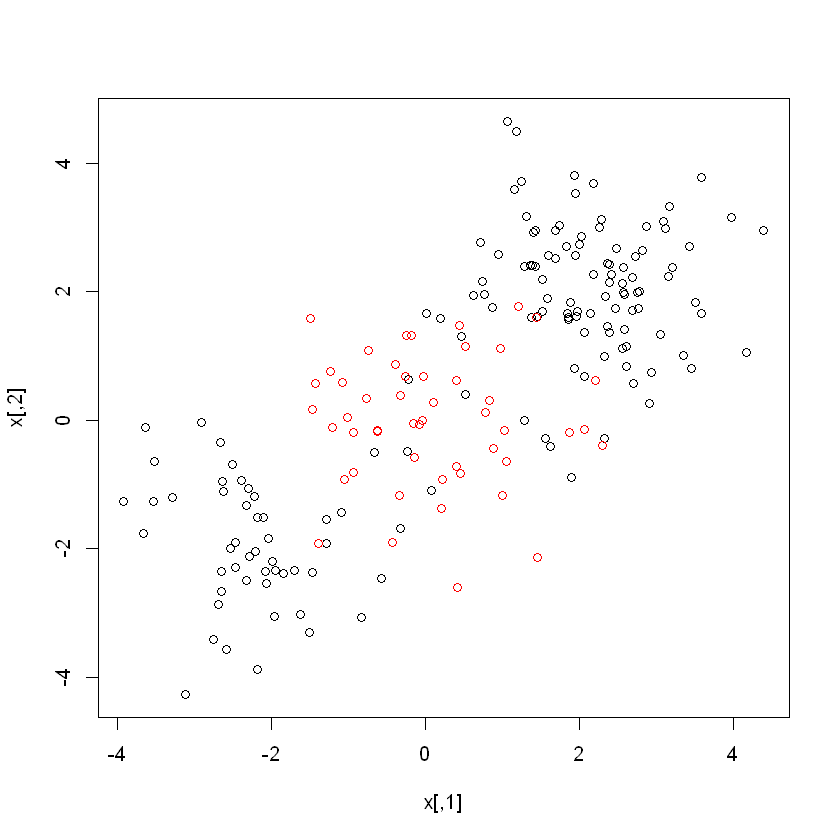

In [16]:
## Fitting with non-linear kernel. Use svm() function with kernel = "polynomial" or kernel = "radial". Polynomial needs a degree parameter, radial uses a gamma parameter.

# Generate data with non-linear class boundary

set.seed(1)
x <- matrix(rnorm (200*2) , ncol=2) # 200x2 matrix of random normally distributed variables
x[1:100,] <- x[1:100,]+2 # first 100 rows we add 2
x[101:150 ,] <- x[101:150,]-2 # next 50 rows subtract 2
y <- c(rep(1,150) ,rep(2,50)) # vector of 150 1s and 50 2s
dat <- data.frame(x=x,y=as.factor(y))

plot(x, col=y)

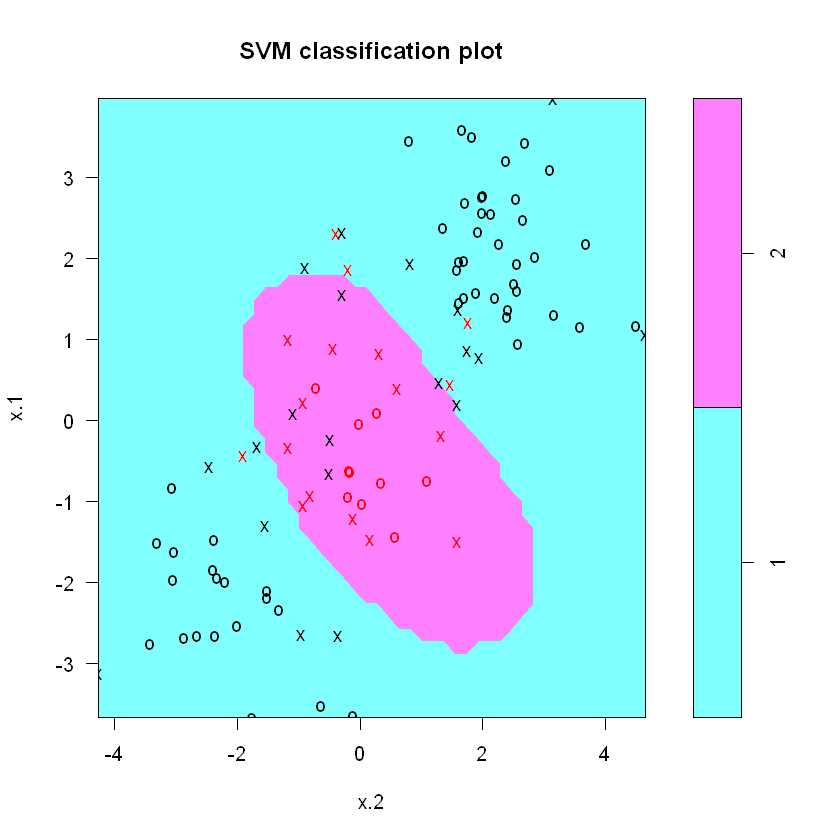

In [17]:
## Randomly split data into training and test sets

train <- sample(200,100) # vector of length 100 sampling numbers from 1 to 200 without replacement

svmfit <- svm(y~., data = dat[train,], kernel = "radial", gamma = 1, cost = 1)

plot(svmfit, dat[train,])
## Resulting SVM has distinctly non-linear boundary.

In [18]:
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 

Number of Support Vectors:  37

 ( 17 20 )


Number of Classes:  2 

Levels: 
 1 2




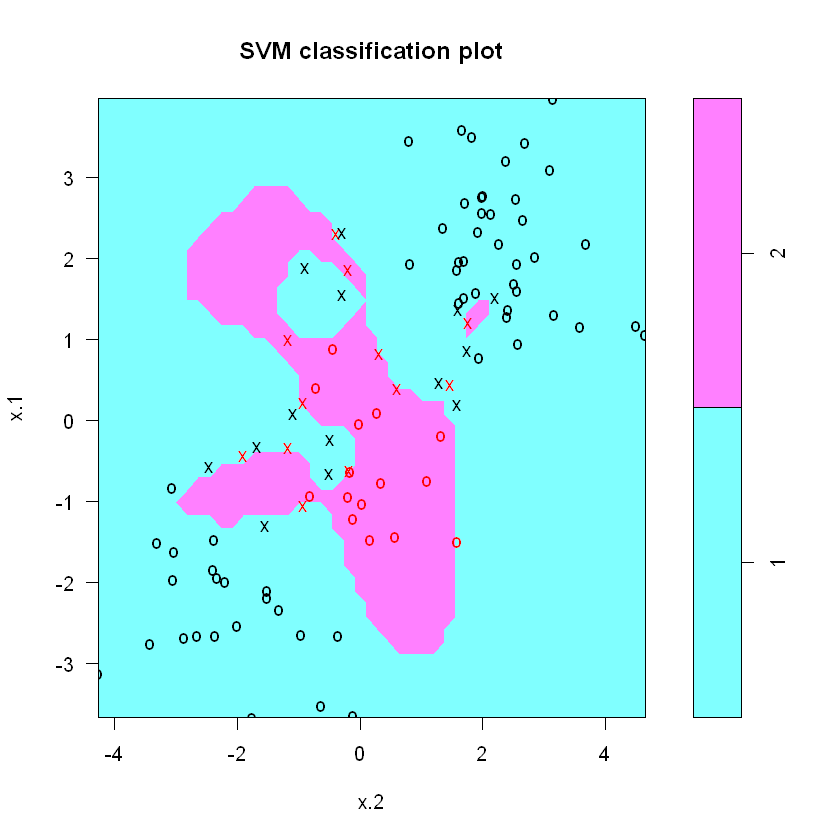

In [19]:
## We can see from the plot that there are a fair number of training errors in this SVM fit. If we increase the value of cost, we can reduce the number of training errors. However, this comes at the price of a more irregular decision boundary that seems to be at risk of overfitting the data.

svmfit <- svm(y~., data=dat[train ,], kernel ="radial", gamma=1, cost=1e5)

plot(svmfit, dat[train,])

In [20]:
## Using tune() to select best value for gamma and cost for SVM with a radial kernel

set.seed(1)
tune.out <- tune(svm, y~., data=dat[train,], kernel = "radial", ranges = list(cost=c(0.1, 1, 10, 100, 1000), gamma = c(0.5, 1, 2, 3, 4)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1     2

- best performance: 0.12 

- Detailed performance results:
    cost gamma error dispersion
1  1e-01   0.5  0.27 0.11595018
2  1e+00   0.5  0.13 0.08232726
3  1e+01   0.5  0.15 0.07071068
4  1e+02   0.5  0.17 0.08232726
5  1e+03   0.5  0.21 0.09944289
6  1e-01   1.0  0.25 0.13540064
7  1e+00   1.0  0.13 0.08232726
8  1e+01   1.0  0.16 0.06992059
9  1e+02   1.0  0.20 0.09428090
10 1e+03   1.0  0.20 0.08164966
11 1e-01   2.0  0.25 0.12692955
12 1e+00   2.0  0.12 0.09189366
13 1e+01   2.0  0.17 0.09486833
14 1e+02   2.0  0.19 0.09944289
15 1e+03   2.0  0.20 0.09428090
16 1e-01   3.0  0.27 0.11595018
17 1e+00   3.0  0.13 0.09486833
18 1e+01   3.0  0.18 0.10327956
19 1e+02   3.0  0.21 0.08755950
20 1e+03   3.0  0.22 0.10327956
21 1e-01   4.0  0.27 0.11595018
22 1e+00   4.0  0.15 0.10801234
23 1e+01   4.0  0.18 0.11352924
24 1e+02   4.0  0.21 0.08755950
25 1e+03   4.0  0.24 0

In [21]:
## Optimal choice of parameters is cost=1, gamma=2.

## Predictions

table(true = dat[-train,"y"], pred = predict(tune.out$best.model, newdata=dat[-train,]))

    pred
true  1  2
   1 74  3
   2  7 16

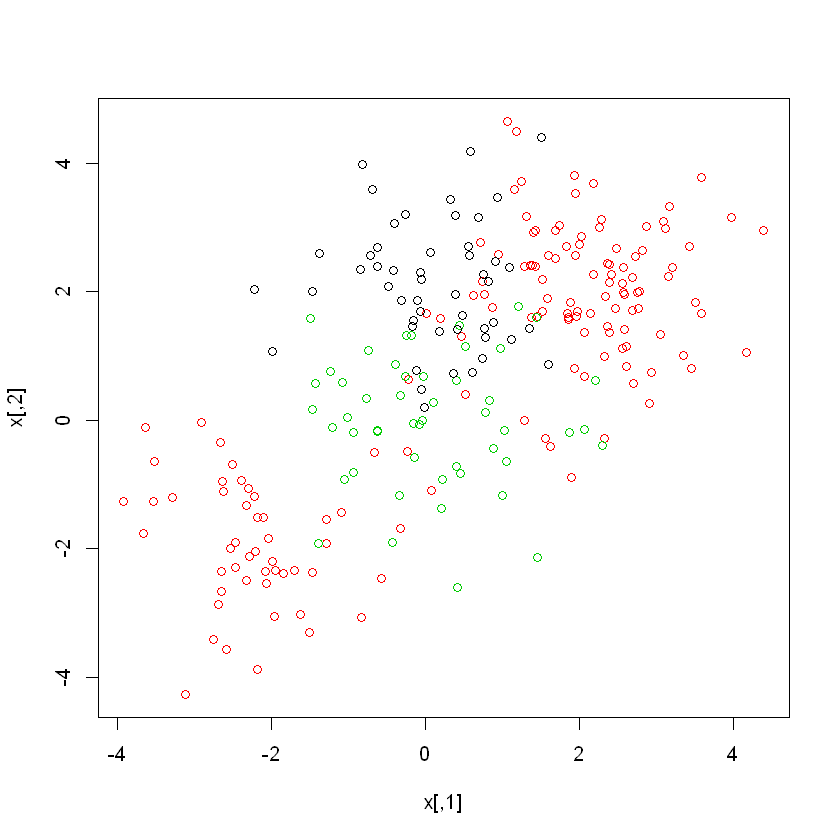

In [22]:
## Accuracy = (74+16)/100 = 90%

## SVM with multiple classes

## If the response is a factor containing more than two levels, then the svm() function will perform multi-class classification using the one-versus-one approach. We explore that setting here by generating a third class of observations.

set.seed(1)
x <- rbind(x, matrix(rnorm (50*2) , ncol=2)) # add another 50 rows to the matrix
y <- c(y, rep(0,50)) # adding a third class, y=0
x[y==0,2] <- x[y==0 ,2]+2 # adding 2 to the second column of rows 201-250
dat <- data.frame(x=x, y=as.factor(y))
plot(x,col=(y+1))

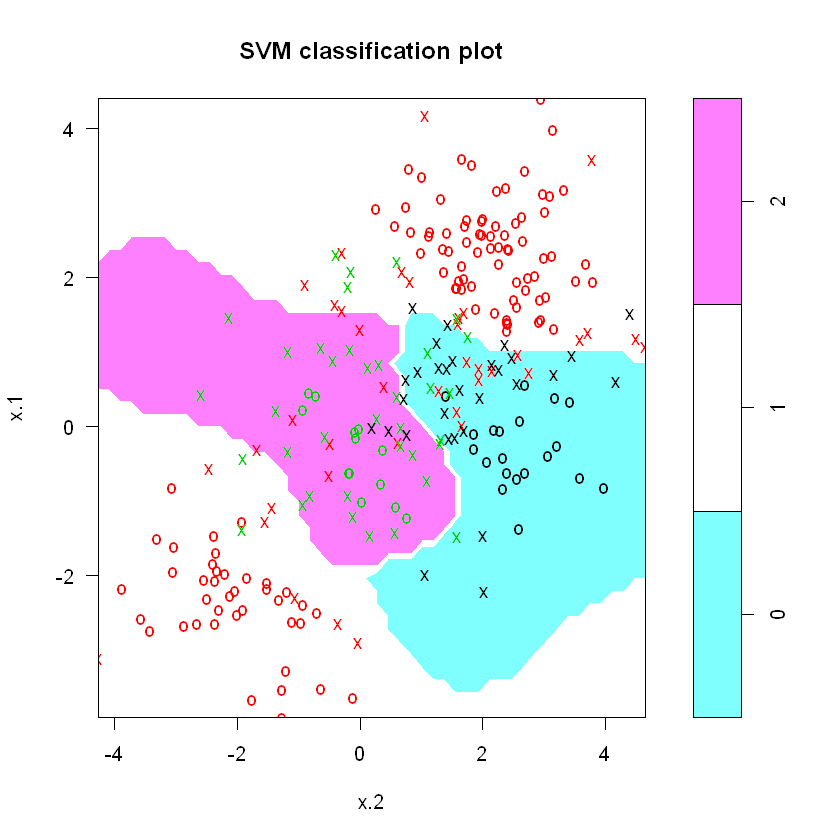

In [23]:
## Fitting SVM to the data

svmfit <- svm(y~., data=dat, kernel = "radial", cost = 10, gamma = 1)
plot(svmfit, dat)

In [ ]:
## The e1071 library can also be used to perform support vector regression, if the response vector that is passed in to svm() is numerical rather than a factor.


# Application to Gene Expression Data

In [26]:
# We now examine the Khan data set, which consists of a number of tissue samples corresponding to four distinct types of small round blue cell tumors. For each tissue sample, gene expression measurements are available. The data set consists of training data, xtrain and ytrain, and testing data, xtest and ytest.

library(ISLR)

str(Khan)

dim(Khan$xtrain)
dim(Khan$xtest)

List of 4
 $ xtrain: num [1:63, 1:2308] 0.7733 -0.0782 -0.0845 0.9656 0.0757 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:63] "V1" "V2" "V3" "V4" ...
  .. ..$ : NULL
 $ xtest : num [1:20, 1:2308] 0.14 1.164 0.841 0.685 -1.956 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:20] "V1" "V2" "V4" "V6" ...
  .. ..$ : NULL
 $ ytrain: num [1:63] 2 2 2 2 2 2 2 2 2 2 ...
 $ ytest : num [1:20] 3 2 4 2 1 3 4 2 3 1 ...


[1]   63 2308

[1]   20 2308

In [28]:
# 63 training observations and 20 test observations with 2,308 variables.

# There are 4 cancer subtypes, V1, V2, V4 and V6

# We have a large number of varibles compared to observations. This suggests that we should use a linear kernel because the additional flexibility that will result from using a polynomial or radial kernel is unnecessary. The ratio of features to observations is so large that non-linear kernels are highly likely to overfit.

dat <- data.frame(x=Khan$xtrain, y=as.factor(Khan$ytrain))
svmfit <- svm(y~., data=dat, kernel = "linear", cost = 10)
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.0004332756 

Number of Support Vectors:  58

 ( 20 20 11 7 )


Number of Classes:  4 

Levels: 
 1 2 3 4




In [29]:
table(svmfit$fitted , dat$y)

   
     1  2  3  4
  1  8  0  0  0
  2  0 23  0  0
  3  0  0 12  0
  4  0  0  0 20

In [30]:
# There are no training errors. This is not surprising, because the large number of features relative to the number of observations implies that it is easy to find hyperplanes that fully separate the classes. We are most interested not in the support vector classifier’s performance on the training observations, but rather its performance on the test observations.

dat.test <- data.frame(x=Khan$xtest , y=as.factor(Khan$ytest))
pred.test <- predict (svmfit , newdata =dat.test)
table(pred.test, dat.test$y)

         
pred.test 1 2 3 4
        1 3 0 0 0
        2 0 6 2 0
        3 0 0 4 0
        4 0 0 0 5

In [33]:
# Using cost = 10 yields two test set errors
# Tuning with cross validation to find optimal cost 

tune.out <- tune(svm, y~., data=dat, kernel = "linear", ranges = list(cost=c(0.01, 0.1, 1, 10, 100, 1000)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
 0.01

- best performance: 0.01666667 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.01666667 0.05270463
2 1e-01 0.01666667 0.05270463
3 1e+00 0.01666667 0.05270463
4 1e+01 0.01666667 0.05270463
5 1e+02 0.01666667 0.05270463
6 1e+03 0.01666667 0.05270463


In [34]:
table(truth = Khan$ytest, pred = predict(tune.out$best.model, newdata = Khan$xtest))

     pred
truth 1 2 3 4
    1 3 0 0 0
    2 0 6 0 0
    3 0 2 4 0
    4 0 0 0 5

In [ ]:
## Test error is the same, two errors

# Applied Exercises

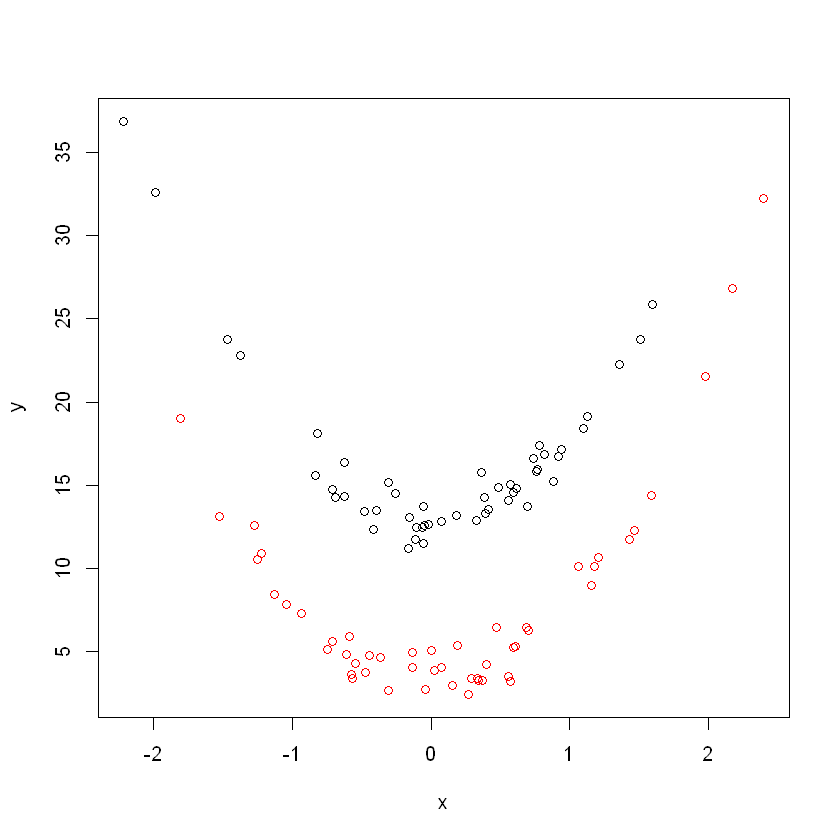

In [35]:
#4) Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

set.seed(1)
x <- rnorm(100)
y <- 5*x^2 + 3 + rnorm(100)
z <- c(rep(1,50), rep(2,50))

y[z==1] <- y[z==1] + 10

plot(x, y, col=z)

In [36]:
df <- data.frame(x=x, y=y, z=as.factor(z))

train <- sample(100,50)

svmlinear <- svm(z~., data = df[train,], kernel = "linear", cost = 1)
linearpred <- predict(svmlinear, newdata = df[-train,])

table(true = df[-train,"z"], pred = linearpred)

    pred
true  1  2
   1 28  0
   2  5 17

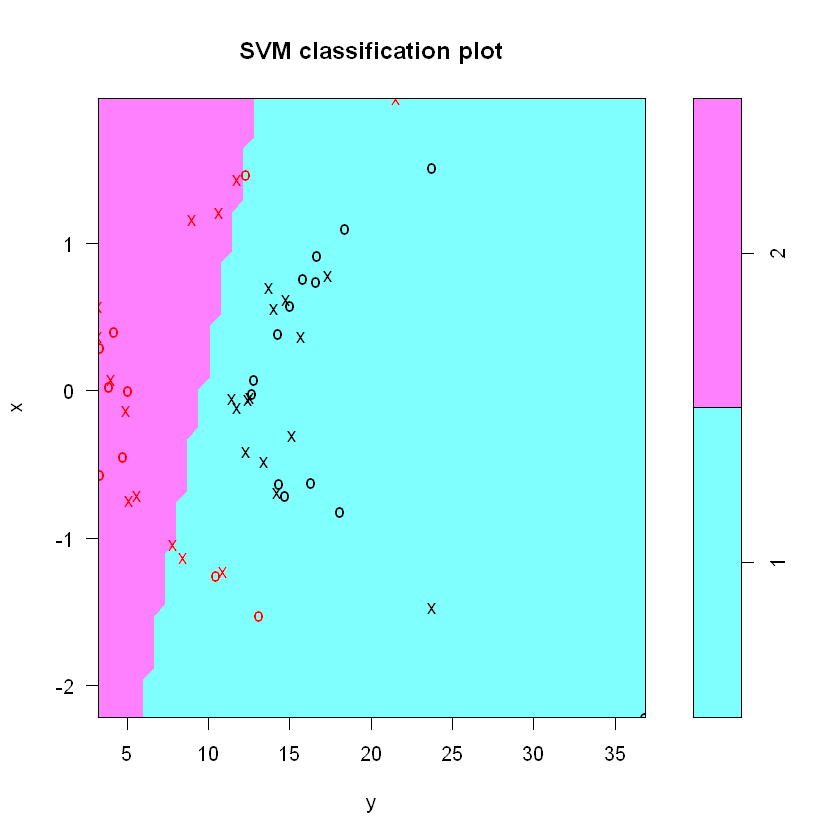

In [37]:
plot(svmlinear, df[-train,])

## Linear kernel misclassifies 5 data points

In [38]:
svmradial <- svm(z~., data = df[train,], kernel = "radial", cost = 1, gamma = 1)
radialpred <- predict(svmradial, newdata = df[-train,])

table(true = df[-train,"z"], pred = radialpred)

    pred
true  1  2
   1 28  0
   2  0 22

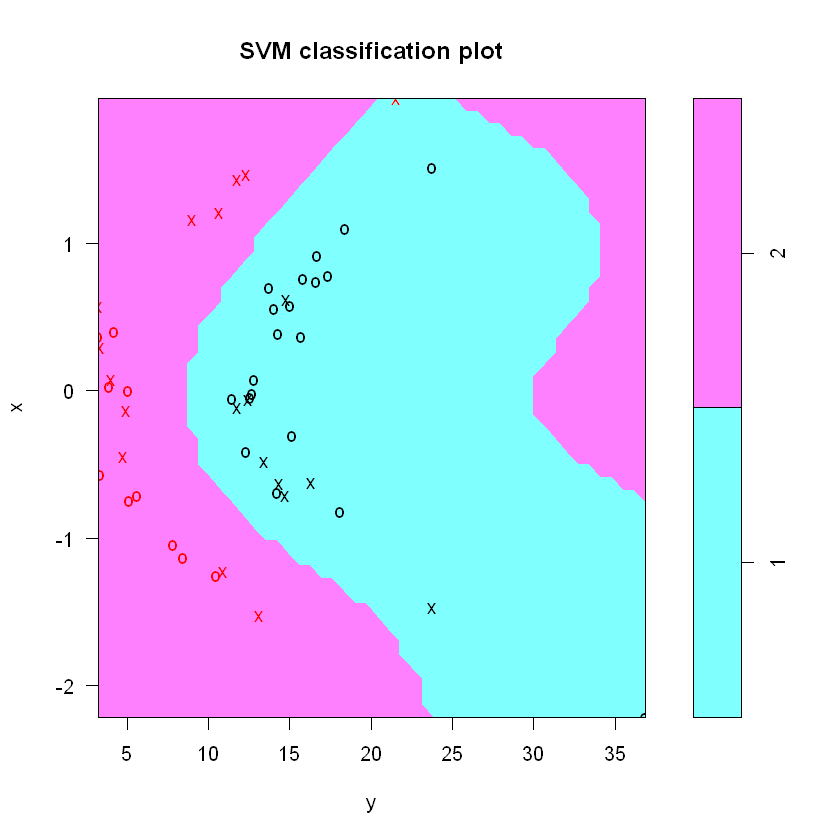

In [39]:
plot(svmradial, df[-train,])

## Radial kernel classifies all points correctly

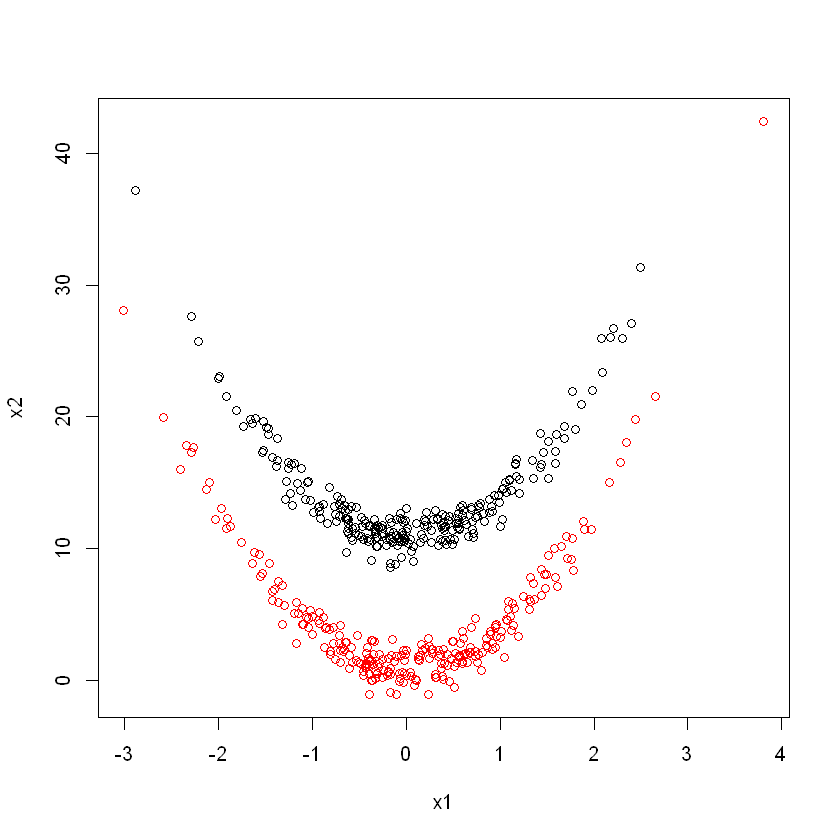

In [43]:
#5)  We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

#a) Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary between them

set.seed(1)
x1 <- rnorm(500)
x2 <- 3*x1^2 + 1 + rnorm(100)
y <- c(rep(1,250), rep(2,250))

x2[y==1] <- x2[y==1] + 10

# b) Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis, and X2 on the yaxis.

plot(x1, x2, col=y)

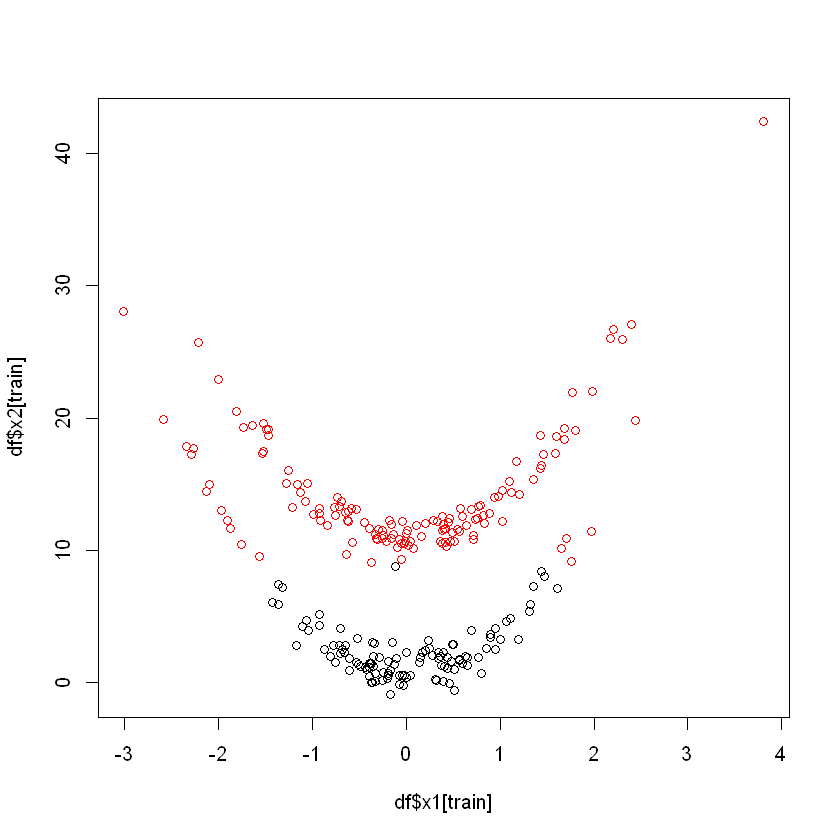

In [44]:
# c) Fit a logistic regression model to the data, using X1 and X2 as predictors.

df <- data.frame(x1 = x1, x2 = x2, y = as.factor(y))

glmfit <- glm(y~., data=df, family="binomial")

# (d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

train <- sample(500, 250)

glmpred <- predict(glmfit, newdata = df[train,], type="response")

glmpred.class <- ifelse(glmpred >= 0.5, 1, 2)

plot(df$x1[train], df$x2[train], col=glmpred.class)

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

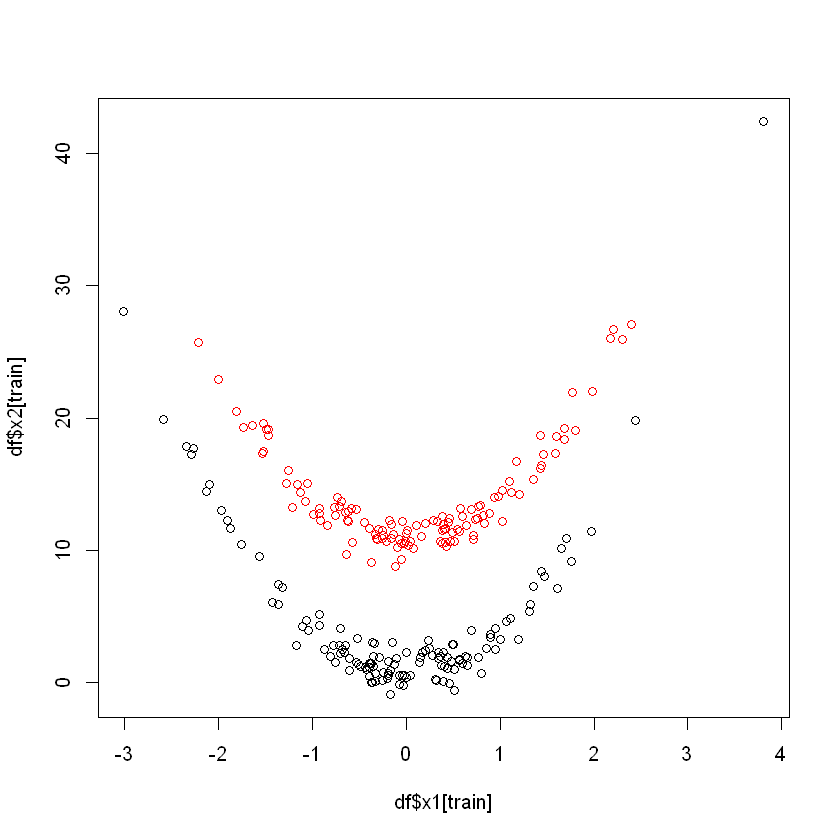

In [45]:
# e) Now fit a logistic regression model to the data using non-linear functions of X1 and X2 as predictors.


glmfit <- glm(y~ poly(x1, 2) + poly(x2, 2), data=df, family="binomial")

#f) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear.

glmpred <- predict(glmfit, newdata = df[train,], type="response")

glmpred.class <- ifelse(glmpred >= 0.5, 1, 2)

plot(df$x1[train], df$x2[train], col=glmpred.class)

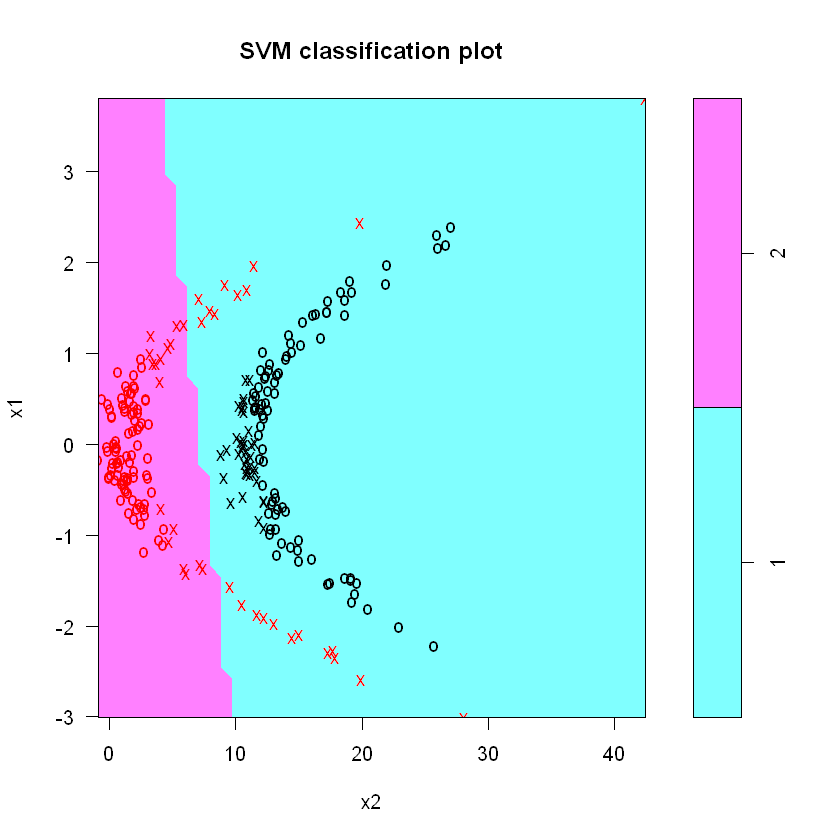

In [46]:
# g) Fit a support vector classifier to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

svmfit <- svm(y~., data = df[train,], kernel = "linear", cost = 1)

plot(svmfit, df[train,])

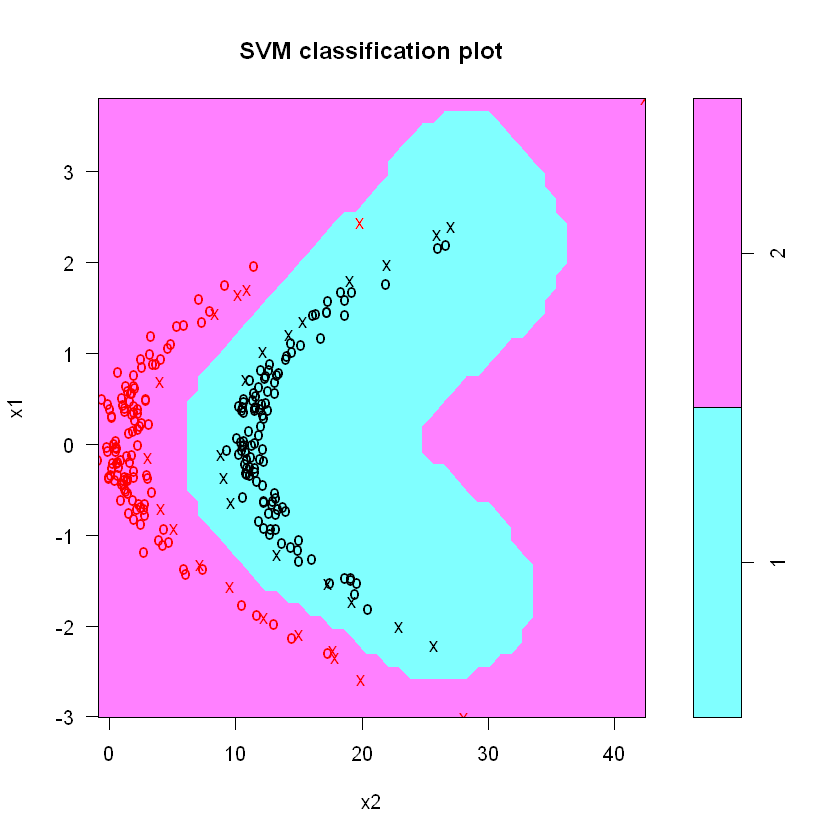

In [47]:
#h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

svmfit <- svm(y~., data = df[train,], kernel = "radial", cost = 1, gamma = 1)

plot(svmfit, df[train,])

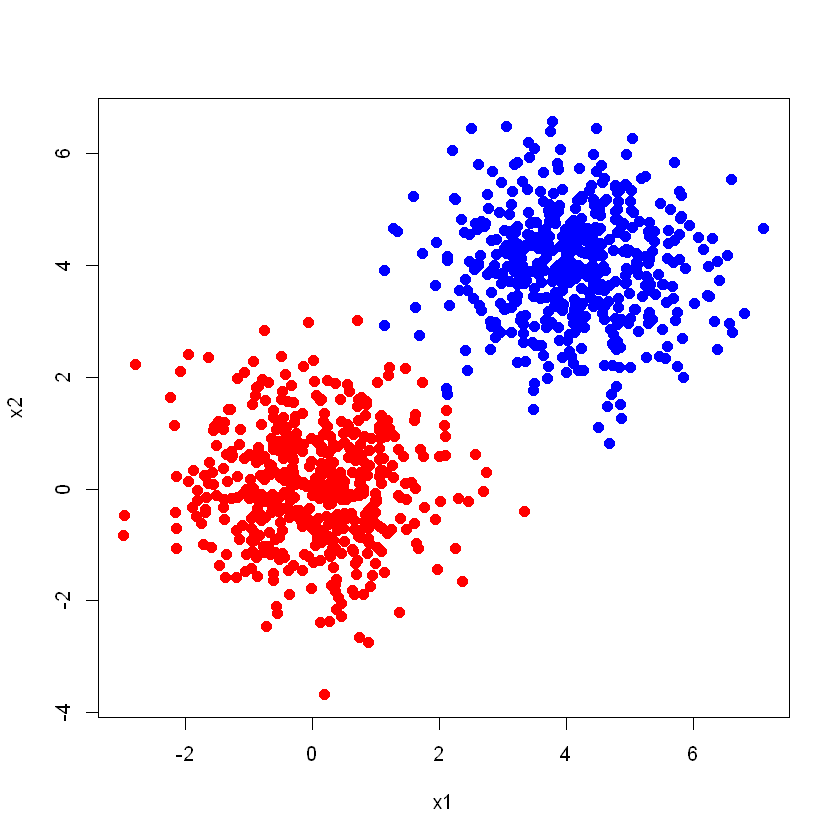

In [92]:
# When the class boundaries are non linear, a linear model will have very poor predictive performance compared to a more flexible model. 

#6) At the end of Section 9.6.1, it is claimed that in the case of data that is just barely linearly separable, a support vector classifier with a small value of cost that misclassifies a couple of training observations may perform better on test data than one with a huge value of cost that does not misclassify any training observations. You will now investigate this claim.

#a) Generate two-class data with p = 2 in such a way that the classes are just barely linearly separable.

x <- matrix( rnorm(1000*2), ncol=2 )
y <- c( rep(-1,500), rep(1,500) )
x[y==1,] = x[y==1,] + 4

plot( x[,1], x[,2], col=(y+3), pch=19, cex=1.25, xlab='x1', ylab='x2')

In [114]:
# (b) Compute the cross-validation error rates for support vector classifiers with a range of cost values. How many training errors are misclassified for each value of cost considered, and how does this relate to the cross-validation errors obtained?

df <- data.frame(x1 = x[,1], x2 = x[,2], y=as.factor(y))
train <- sample(1000,500)

tune.out <- tune(svm, y~., data=df[train,], kernel ="linear", ranges=list(cost=c(0.01, 0.1, 1, 10, 100, 1000)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.002 

- Detailed performance results:
   cost error  dispersion
1 1e-02 0.004 0.012649111
2 1e-01 0.004 0.012649111
3 1e+00 0.004 0.012649111
4 1e+01 0.002 0.006324555
5 1e+02 0.004 0.008432740
6 1e+03 0.004 0.008432740


In [115]:
svm.cost0.01 <- svm(y~., data=df[train,], kernel = "linear", cost = 0.01)
table(true = df[train,"y"], pred = predict(svm.cost0.01, newdata = df[train,]))

    pred
true  -1   1
  -1 264   0
  1    2 234

In [116]:
# Two points are misclassified

svm.cost0.1 <- svm(y~., data=df[train,], kernel = "linear", cost = 0.1)
table(true = df[train,"y"], pred = predict(svm.cost0.1, newdata = df[train,]))

    pred
true  -1   1
  -1 264   0
  1    1 235

In [117]:
# One point is misclassified

svm.cost1 <- svm(y~., data=df[train,], kernel = "linear", cost = 1)
table(true = df[-train,"y"], pred = predict(svm.cost1, newdata = df[-train,]))

    pred
true  -1   1
  -1 235   1
  1    1 263

In [118]:
# Two points are misclassified

svm.cost10 <- svm(y~., data=df[train,], kernel = "linear", cost = 10)
table(true = df[train,"y"], pred = predict(svm.cost10, newdata = df[train,]))

    pred
true  -1   1
  -1 264   0
  1    0 236

In [119]:
# No points are misclassified

svm.cost100 <- svm(y~., data=df[train,], kernel = "linear", cost = 100)
table(true = df[train,"y"], pred = predict(svm.cost100, newdata = df[train,]))

    pred
true  -1   1
  -1 264   0
  1    0 236

In [120]:
# No points are misclassified

#c) Generate an appropriate test data set, and compute the test errors corresponding to each of the values of cost considered. Which value of cost leads to the fewest test errors, and how does this compare to the values of cost that yield the fewest training errors and the fewest cross-validation errors?

table(true = df[-train,"y"], pred = predict(svm.cost0.01, newdata = df[-train,]))

    pred
true  -1   1
  -1 236   0
  1    1 263

In [125]:
table(true = df[-train,"y"], pred = predict(svm.cost0.1, newdata = df[-train,]))

    pred
true  -1   1
  -1 236   0
  1    1 263

In [122]:
table(true = df[-train,"y"], pred = predict(svm.cost1, newdata = df[-train,]))

    pred
true  -1   1
  -1 235   1
  1    1 263

In [123]:
table(true = df[-train,"y"], pred = predict(svm.cost10, newdata = df[-train,]))

    pred
true  -1   1
  -1 235   1
  1    1 263

In [126]:
table(true = df[-train,"y"], pred = predict(svm.cost100, newdata = df[-train,]))

    pred
true  -1   1
  -1 236   0
  1    0 264

In [ ]:
# All models show the same results in the test data, miclassifying one data point. We again see an overfitting phenomenon for linear kernel. A large cost tries to correctly classify noisy points and hence overfits the train data. A small cost, however, makes a few errors on the noisy test points and performs better overall on the test data.

In [133]:
# 7)In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.

# a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

data(mtcars)
df <- mtcars

library(dplyr, quietly=TRUE)

df_processed <- df %>%
                  mutate(Mileage = ifelse(mpg > median(mpg), 1, 0))

df_processed$Mileage <- as.factor(df_processed$Mileage)

#b) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.

tune.out.linear <- tune(svm, Mileage~., data = df_processed, kernel = "linear", ranges = list(cost=c(0.01, 0.1, 1, 10, 100)))

summary(tune.out.linear)

# Errors are similar at all values of cost, suggests that there is a wide margin?


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.08333333 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.14166667  0.1926505
2 1e-01 0.08333333  0.1360828
3 1e+00 0.11666667  0.1531561
4 1e+01 0.11666667  0.1531561
5 1e+02 0.11666667  0.1531561


In [135]:
# Optimal cost parameter is 0.1


#c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and cost. Comment on your results.

tune.out.poly <- tune(svm, Mileage~., data = df_processed, kernel = "polynomial", ranges = list(cost=c(0.01, 0.1, 1, 10, 100), degree = c(2,3,4,5)))

summary(tune.out.poly)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
   10      3

- best performance: 0.06666667 

- Detailed performance results:
    cost degree      error dispersion
1  1e-02      2 0.58333333  0.2832789
2  1e-01      2 0.58333333  0.2832789
3  1e+00      2 0.50000000  0.3513642
4  1e+01      2 0.16666667  0.2357023
5  1e+02      2 0.23333333  0.2744242
6  1e-02      3 0.45833333  0.3269056
7  1e-01      3 0.21666667  0.3122993
8  1e+00      3 0.15000000  0.2249829
9  1e+01      3 0.06666667  0.1405457
10 1e+02      3 0.10000000  0.1610153
11 1e-02      4 0.58333333  0.2832789
12 1e-01      4 0.58333333  0.2357023
13 1e+00      4 0.45833333  0.3584302
14 1e+01      4 0.32500000  0.3523510
15 1e+02      4 0.20000000  0.3220306
16 1e-02      5 0.52500000  0.3240608
17 1e-01      5 0.35833333  0.3644080
18 1e+00      5 0.25000000  0.3042903
19 1e+01      5 0.19166667  0.3192632
20 1e+02      5 0.15833333  0.2305723


In [136]:
# Polynomial kernel outperforms the linear kernel, 6.66% error rate vs 8.33%

tune.out.radial <- tune(svm, Mileage~., data = df_processed, kernel = "radial", ranges = list(cost=c(0.01, 0.1, 1, 10, 100), gamma = c(1,2,3,4,5)))

summary(tune.out.radial)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1     1

- best performance: 0.1083333 

- Detailed performance results:
    cost gamma     error dispersion
1  1e-02     1 0.6166667  0.2944969
2  1e-01     1 0.6166667  0.2944969
3  1e+00     1 0.1083333  0.1844662
4  1e+01     1 0.1083333  0.1844662
5  1e+02     1 0.1083333  0.1844662
6  1e-02     2 0.6166667  0.2944969
7  1e-01     2 0.6166667  0.2944969
8  1e+00     2 0.2083333  0.2919972
9  1e+01     2 0.2083333  0.2919972
10 1e+02     2 0.2083333  0.2919972
11 1e-02     3 0.6166667  0.2944969
12 1e-01     3 0.6166667  0.2944969
13 1e+00     3 0.3083333  0.2547390
14 1e+01     3 0.3083333  0.2547390
15 1e+02     3 0.3083333  0.2547390
16 1e-02     4 0.6166667  0.2944969
17 1e-01     4 0.6166667  0.2944969
18 1e+00     4 0.4416667  0.3192632
19 1e+01     4 0.4083333  0.3104407
20 1e+02     4 0.4083333  0.3104407
21 1e-02     5 0.6166667  0.2944969
22 1e-01     5 0.6166667 

In [ ]:
# Radial kernel performs worse than the polynomial kernel and the linear kernel 

In [137]:
#8) This problem involves the OJ data set which is part of the ISLR package.

#a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

data(OJ)
dim(OJ)

set.seed(1)
trainid <- sample(nrow(OJ), 800)

train <- OJ[trainid,]
test <- OJ[-trainid,]

#b) Fit a support vector classifier to the training data using cost=0.01, with Purchase as the response and the other variables as predictors. Use the summary() function to produce summary statistics, and describe the results obtained.

svm.linear <- svm(Purchase ~ ., data = train, kernel = "linear", cost = 0.01)
summary(svm.linear)


[1] 1070   18


Call:
svm(formula = Purchase ~ ., data = train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 
      gamma:  0.05555556 

Number of Support Vectors:  432

 ( 215 217 )


Number of Classes:  2 

Levels: 
 CH MM




In [138]:
# The support vector classifier with cost=0.01 results in 432 support vectors. 215 are from level Citrus Hill and 217 from level Minute Maid.

#c) What are the training and test error rates?

predict.train <- predict(svm.linear, newdata = train)

library(caret)
confusionMatrix(predict.train, train[["Purchase"]])

Loading required package: lattice
Loading required package: ggplot2


Confusion Matrix and Statistics

          Reference
Prediction  CH  MM
        CH 439  78
        MM  55 228
                                          
               Accuracy : 0.8338          
                 95% CI : (0.8061, 0.8589)
    No Information Rate : 0.6175          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.643           
 Mcnemar's Test P-Value : 0.05644         
                                          
            Sensitivity : 0.8887          
            Specificity : 0.7451          
         Pos Pred Value : 0.8491          
         Neg Pred Value : 0.8057          
             Prevalence : 0.6175          
         Detection Rate : 0.5487          
   Detection Prevalence : 0.6462          
      Balanced Accuracy : 0.8169          
                                          
       'Positive' Class : CH              
                                          

In [139]:
# Training error rate = 1-0.8338 = 16.62%

predict.test <- predict(svm.linear, newdata = test)
confusionMatrix(predict.test, test[["Purchase"]])

Confusion Matrix and Statistics

          Reference
Prediction  CH  MM
        CH 141  31
        MM  18  80
                                          
               Accuracy : 0.8185          
                 95% CI : (0.7673, 0.8626)
    No Information Rate : 0.5889          
    P-Value [Acc > NIR] : 5.763e-16       
                                          
                  Kappa : 0.6184          
 Mcnemar's Test P-Value : 0.08648         
                                          
            Sensitivity : 0.8868          
            Specificity : 0.7207          
         Pos Pred Value : 0.8198          
         Neg Pred Value : 0.8163          
             Prevalence : 0.5889          
         Detection Rate : 0.5222          
   Detection Prevalence : 0.6370          
      Balanced Accuracy : 0.8038          
                                          
       'Positive' Class : CH              
                                          

In [140]:
# Test error rate = 1-0.8185 = 18.15%

#d) Use the tune() function to select an optimal cost. Consider values in the range 0.01 to 10.

tune.out <- tune(svm, Purchase ~ ., data = train, kernel = "linear", ranges = list(cost = c(0.01, 0.05, 0.1, 1, 5, 10)))

summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
 0.05

- best performance: 0.16125 

- Detailed performance results:
   cost   error dispersion
1  0.01 0.16625 0.05138701
2  0.05 0.16125 0.05318012
3  0.10 0.16250 0.04894725
4  1.00 0.16875 0.04723243
5  5.00 0.16750 0.05041494
6 10.00 0.16500 0.04993051


In [141]:
bestmod <- tune.out$best.model

#e) Compute the training and test error rates using this new value for cost.

pred.bestmod.train <- predict(bestmod, newdata = train)
confusionMatrix(pred.bestmod.train, train[["Purchase"]])


Confusion Matrix and Statistics

          Reference
Prediction  CH  MM
        CH 436  71
        MM  58 235
                                          
               Accuracy : 0.8388          
                 95% CI : (0.8114, 0.8636)
    No Information Rate : 0.6175          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6559          
 Mcnemar's Test P-Value : 0.2907          
                                          
            Sensitivity : 0.8826          
            Specificity : 0.7680          
         Pos Pred Value : 0.8600          
         Neg Pred Value : 0.8020          
             Prevalence : 0.6175          
         Detection Rate : 0.5450          
   Detection Prevalence : 0.6338          
      Balanced Accuracy : 0.8253          
                                          
       'Positive' Class : CH              
                                          

In [142]:
# Training error rate = 1-0.8388 = 16.12%

pred.bestmod.test <- predict(bestmod, newdata = test)
confusionMatrix(pred.bestmod.test, test[["Purchase"]])

Confusion Matrix and Statistics

          Reference
Prediction  CH  MM
        CH 139  31
        MM  20  80
                                         
               Accuracy : 0.8111         
                 95% CI : (0.7592, 0.856)
    No Information Rate : 0.5889         
    P-Value [Acc > NIR] : 5.479e-15      
                                         
                  Kappa : 0.604          
 Mcnemar's Test P-Value : 0.1614         
                                         
            Sensitivity : 0.8742         
            Specificity : 0.7207         
         Pos Pred Value : 0.8176         
         Neg Pred Value : 0.8000         
             Prevalence : 0.5889         
         Detection Rate : 0.5148         
   Detection Prevalence : 0.6296         
      Balanced Accuracy : 0.7975         
                                         
       'Positive' Class : CH             
                                         

In [143]:
# Test error rate = 1-0.8111 = 18.89%

# f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for gamma

svm.radial <- svm(formula = Purchase ~ ., data = train, kernel = "radial", cost = 0.01)
summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = train, kernel = "radial", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  0.01 
      gamma:  0.05555556 

Number of Support Vectors:  617

 ( 306 311 )


Number of Classes:  2 

Levels: 
 CH MM




In [144]:
# The radial support vector classifier with cost=0.01 results in 617 support vectors. 306 are from level Citrus Hill and 311 from level Minute Maid.

tune.out <- tune(svm, Purchase ~ ., data = train, kernel = "radial", ranges = list(cost=c(0.01, 0.05, 0.1, 0.5, 1, 5, 10)))

summary(tune.out)



Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.5

- best performance: 0.17 

- Detailed performance results:
   cost   error dispersion
1  0.01 0.38250 0.06800735
2  0.05 0.21250 0.04787136
3  0.10 0.18250 0.03917553
4  0.50 0.17000 0.05143766
5  1.00 0.17625 0.04980866
6  5.00 0.17125 0.03955042
7 10.00 0.18250 0.03446012


In [145]:
bestmod.radial <- tune.out$best.model

pred.bestmod.radial.train <- predict(bestmod.radial, newdata = train)
confusionMatrix(pred.bestmod.radial.train, train[["Purchase"]])

Confusion Matrix and Statistics

          Reference
Prediction  CH  MM
        CH 453  77
        MM  41 229
                                         
               Accuracy : 0.8525         
                 95% CI : (0.826, 0.8764)
    No Information Rate : 0.6175         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6806         
 Mcnemar's Test P-Value : 0.001273       
                                         
            Sensitivity : 0.9170         
            Specificity : 0.7484         
         Pos Pred Value : 0.8547         
         Neg Pred Value : 0.8481         
             Prevalence : 0.6175         
         Detection Rate : 0.5663         
   Detection Prevalence : 0.6625         
      Balanced Accuracy : 0.8327         
                                         
       'Positive' Class : CH             
                                         

In [146]:
# Training error = 1-0.8525 = 14.75%

pred.bestmod.radial.test <- predict(bestmod.radial, newdata = test)
confusionMatrix(pred.bestmod.radial.test, test[["Purchase"]])

Confusion Matrix and Statistics

          Reference
Prediction  CH  MM
        CH 143  29
        MM  16  82
                                          
               Accuracy : 0.8333          
                 95% CI : (0.7834, 0.8758)
    No Information Rate : 0.5889          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.6496          
 Mcnemar's Test P-Value : 0.07364         
                                          
            Sensitivity : 0.8994          
            Specificity : 0.7387          
         Pos Pred Value : 0.8314          
         Neg Pred Value : 0.8367          
             Prevalence : 0.5889          
         Detection Rate : 0.5296          
   Detection Prevalence : 0.6370          
      Balanced Accuracy : 0.8191          
                                          
       'Positive' Class : CH              
                                          

In [147]:
# Test error = 1-0.8333 = 16.7%

# g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set degree=2.

svm.poly <- svm(formula = Purchase ~ ., data = train, kernel = "polynomial", cost = 0.01, degree = 2)
summary(svm.poly)


Call:
svm(formula = Purchase ~ ., data = train, kernel = "polynomial", 
    cost = 0.01, degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  0.01 
     degree:  2 
      gamma:  0.05555556 
     coef.0:  0 

Number of Support Vectors:  620

 ( 306 314 )


Number of Classes:  2 

Levels: 
 CH MM




In [148]:
# The polynomial support vector classifier with cost=0.01 results in 620 support vectors. 306 are from level Citrus Hill and 314 from level Minute Maid.

tune.out <- tune(svm, Purchase ~ ., data = train, kernel = "polynomial", degree = 2, ranges = list(cost=c(0.01, 0.05, 0.1, 0.5, 1, 5, 10)))

summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.17125 

- Detailed performance results:
   cost   error dispersion
1  0.01 0.38250 0.03872983
2  0.05 0.33250 0.05309844
3  0.10 0.33000 0.04257347
4  0.50 0.20875 0.03387579
5  1.00 0.19750 0.03162278
6  5.00 0.17375 0.04016027
7 10.00 0.17125 0.03729108


In [149]:

bestmod.poly <- tune.out$best.model


pred.bestmod.poly.train <- predict(bestmod.poly, newdata = train)
confusionMatrix(pred.bestmod.poly.train, train[["Purchase"]])

Confusion Matrix and Statistics

          Reference
Prediction  CH  MM
        CH 450  72
        MM  44 234
                                          
               Accuracy : 0.855           
                 95% CI : (0.8287, 0.8787)
    No Information Rate : 0.6175          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.6876          
 Mcnemar's Test P-Value : 0.01218         
                                          
            Sensitivity : 0.9109          
            Specificity : 0.7647          
         Pos Pred Value : 0.8621          
         Neg Pred Value : 0.8417          
             Prevalence : 0.6175          
         Detection Rate : 0.5625          
   Detection Prevalence : 0.6525          
      Balanced Accuracy : 0.8378          
                                          
       'Positive' Class : CH              
                                          

In [150]:
# Training error = 1-0.855 = 14.5%

pred.bestmod.poly.test <- predict(bestmod.poly, newdata = test)
confusionMatrix(pred.bestmod.poly.test, test[["Purchase"]])

Confusion Matrix and Statistics

          Reference
Prediction  CH  MM
        CH 140  31
        MM  19  80
                                          
               Accuracy : 0.8148          
                 95% CI : (0.7633, 0.8593)
    No Information Rate : 0.5889          
    P-Value [Acc > NIR] : 1.799e-15       
                                          
                  Kappa : 0.6112          
 Mcnemar's Test P-Value : 0.1198          
                                          
            Sensitivity : 0.8805          
            Specificity : 0.7207          
         Pos Pred Value : 0.8187          
         Neg Pred Value : 0.8081          
             Prevalence : 0.5889          
         Detection Rate : 0.5185          
   Detection Prevalence : 0.6333          
      Balanced Accuracy : 0.8006          
                                          
       'Positive' Class : CH              
                                          

In [151]:
# Test error = 1-0.8148 = 18.52%

# The radial kernel shows the smallest test error rate at 16.7% 